In [1]:
import os 
os.chdir('/home/xinglong/git_local/ssm-jax')
import jax
jax.config.update('jax_platform_name', 'cpu')

# Causal Impact Jax

The causal impact R package: <a href="https://google.github.io/CausalImpact/CausalImpact.html"> CausalImpact</a> is built upon the R package <a href="https://cran.r-project.org/web/packages/bsts/bsts.pdf"> bsts </a> for Bayesian structural time series models.

There are some python packages that implement the causal impact algorithm with python:
* The package <a href="https://github.com/WillianFuks/tfcausalimpact"> tfcausalimpact </a> is built upon the 
<a href="https://www.tensorflow.org/probability/api_docs/python/tfp/sts"> tfp.sts module </a>.
* The package <a href="https://pypi.org/project/pycausalimpact/"> pycausalimpact </a> is built upon the package
 <a href="https://github.com/statsmodels/statsmodels"> statsmodels </a>.
* The package <a href="https://github.com/jamalsenouci/causalimpact"> causalimpact </a> is also built upon the package ‘statsmodel’.

The R package ‘bsts’, python packages ‘tfp.sts’, and ‘statsmodels’ all contain functions that build the structural time series model and perform posterior inference and forecast predictions.

## Causal impact

## Example 

Use the same example as in the R package <a href="http://google.github.io/CausalImpact/CausalImpact.html"> CausalImpact</a>.

In [16]:
import jax.numpy as jnp
import jax.random as jr
from jax import lax
import matplotlib.pyplot as plt

from causal_impact import causal_impact

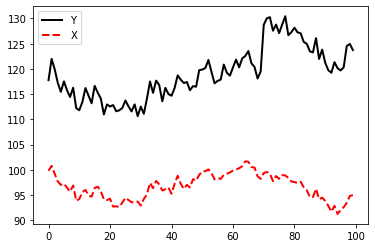

In [54]:
num_timesteps = 100

def auto_regress(x, key):
    x_new = 0.99 * x + jr.normal(key)
    return x_new, x

key = jr.PRNGKey(0)
x0 = jr.normal(key)
keys = jr.split(key, num_timesteps)
_, x =  lax.scan(auto_regress, x0, keys)
x = x + 100

y = 1.2*x + jr.normal(key, shape=(num_timesteps,))
y = y.at[70:].set(y[70:]+10)

# If there is a regression component, the data is  of shape (num_timesteps, 1+k),
# with the first column of data being the response variable,
# and the following columns k columns being k explanatory variables.
data = jnp.concatenate((jnp.atleast_2d(y).T, jnp.atleast_2d(x).T), axis=1)

plt.plot(data[:, 0], label='Y', color='black', lw=2)
plt.plot(data[:, 1], linestyle='dashed', color='red', lw=2, label='X')
plt.legend()

In [ ]:
# Run an anlysis
# Time points 1 … 70 will be used for training, 
# and time points 71 … 100 will be used for computing predictions.
pre_period = (0, 70)
post_period = (70, 100)
impact = causal_impact(data, pre_period, post_period)

In [ ]:
# Print the summaries of the inferred causal impact
impact.summary()

In [ ]:
# Plot the inferred causal impact
impact.plot()